# Gridding map data

We'll use the data from [the simple kriging exercise](Simple_kriging.ipynb).

## Load and inspect the data

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
 
with open( '../data/ZoneA.dat', 'r') as f:
    z = f.readlines()
z = [i.strip().split() for i in z[10:]]
z = np.array( z, dtype=np.float )
z = pd.DataFrame( z, columns=['x', 'y', 'thk', 'por', 'perm', 'lperm', 'lpermp', 'lpermr'] )

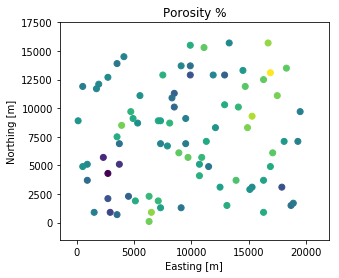

In [3]:
fig, ax = plt.subplots()
ax.scatter(z.x, z.y, c=z.por)
ax.set_aspect(1)
plt.xlim(-1500,22000)
plt.ylim(-1500,17500)
plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.title('Porosity %')
plt.show()

## Make the grid and interpolate with RBF

Following [this recipe](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html#scipy.interpolate.Rbf)

We must make a grid, which represents the points we'd like to predict.

In [4]:
extent = z.x.min(), z.x.max(), z.y.min(), z.y.max()
extent

(100.0, 19500.0, 100.0, 15700.0)

In [5]:
extent = [0, 20000, 0, 16000]

In [6]:
grid_x, grid_y = np.mgrid[0:20000:200j, 0:16000:160j]

Now we make an interpolator and use it to predict into the grid 'cells'.

In [7]:
from scipy.interpolate import Rbf

# Make an n-dimensional interpolator.
rbfi = Rbf(z.x, z.y, z.por)

# Predict on the regular grid.
di = rbfi(grid_x, grid_y)

Let's plot the result. Notice the transpose and the `origin='lower'`, to keep everything matched up with the original dataset.

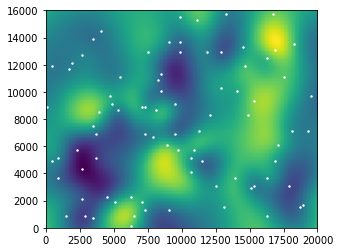

In [8]:
plt.imshow(di.T, origin="lower", extent=extent)
plt.scatter(z.x, z.y, s=2, c='w')

## Other interpolators

Following [this SciPy recipe](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.griddata.html)

The `points` are the (x, y) locations of the points we know; `values` are their values.

In [9]:
points = np.array(list(zip(z.x, z.y)))
values = z.por.values

The grdding step is easy:

In [10]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

Inspect the results.

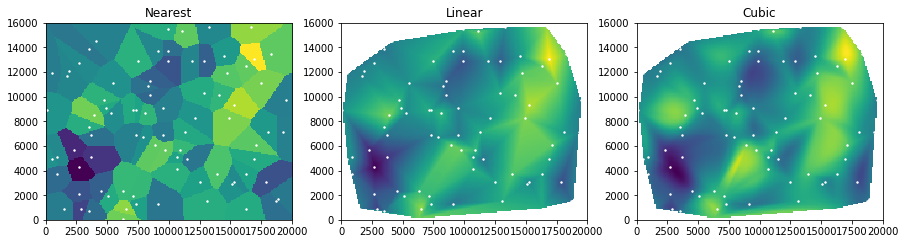

In [12]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

ax = axs[0]
ax.imshow(grid_z0.T, origin='lower', extent=extent)
ax.scatter(z.x, z.y, s=2, c='w')
ax.set_title('Nearest')

ax = axs[1]
ax.imshow(grid_z1.T, origin='lower', extent=extent)
ax.scatter(z.x, z.y, s=2, c='w')
ax.set_title('Linear')

ax = axs[2]
ax.imshow(grid_z2.T, origin='lower', extent=extent)
ax.scatter(z.x, z.y, s=2, c='w')
ax.set_title('Cubic')

plt.show()